# Strategy 1:

Randomly pick any positional player who played (game does not let you pick a starting pitcher in the NL).

Number of picks per day:  1
Pick any season
Play everyday of the season
Simulate experiment 1,000 times
Plot and show results

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
from streak_counter import streak_counter, hit_checker
import random
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm

d = pd.read_csv('../retrosheet_data/2005-2018_games.csv')
d.rename(columns={'unknown':'double_header_flag'}, inplace=True)
d['ab_flag'] = d.ab_flag.map({'F':0,'T':1})

In [2]:
df = d.copy()
year = int(input())
df = df[df['year'] == year]
groups = df.groupby(['month','day_'])

2016


In [3]:
game_dates = groups.nunique().index.tolist()

In [4]:
list_streaks = []
for _ in tqdm(range(1000)):
    streak = 0   #reset the streak every time the season ends
    for dates in game_dates:   #game_dates is a list of tuples, each tuple is (month, day)
        daily_df = groups.get_group(dates)
        #req to remove pitchers since you cant pick them
        available_batters = set(daily_df.res_batter.unique())  - set (daily_df.res_pitcher)   
        batters = random.sample((available_batters),1)
        new_streak = hit_checker(daily_df, batters)
        if new_streak == 'continue_streak':
            pass
        elif new_streak == 'lose_streak' :
            list_streaks.append(streak)
            streak = 0
        else:
            streak = streak + new_streak

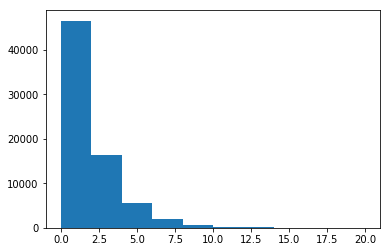

In [5]:
plt.hist(list_streaks);

In [6]:
l_series = pd.Series(list_streaks).value_counts()
l_series

0     29214
1     17306
2     10171
3      6083
4      3569
5      2055
6      1236
7       732
8       411
9       289
10      168
11       96
12       57
13       33
15       14
14       12
16        5
18        4
17        3
19        2
20        1
dtype: int64

In [7]:
results = l_series.to_frame().reset_index()
results.rename(columns={'index':'Streak',0:'number_of_times'},inplace=True)
results['percentage'] = results['number_of_times'] / sum(results['number_of_times'])
results.sort_values(by='Streak',inplace=True);

In [8]:
results

,Streak,number_of_times,percentage
0,0,29214,0.408810
1,1,17306,0.242174
2,2,10171,0.142329
3,3,6083,0.085123
4,4,3569,0.049943
5,5,2055,0.028757
6,6,1236,0.017296
7,7,732,0.010243
8,8,411,0.005751
9,9,289,0.004044


In [9]:
print('total number of streaks:', sum(l_series))

total number of streaks: 71461
